In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [7]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Define test size ratios to try
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

In [8]:
# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

# Dictionary to store results
results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} 
          for name in classifiers.keys()}

In [9]:
# For each test size ratio
for test_size in test_sizes:

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        # Calculate metrics
        results[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[name]['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        results[name]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        results[name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))

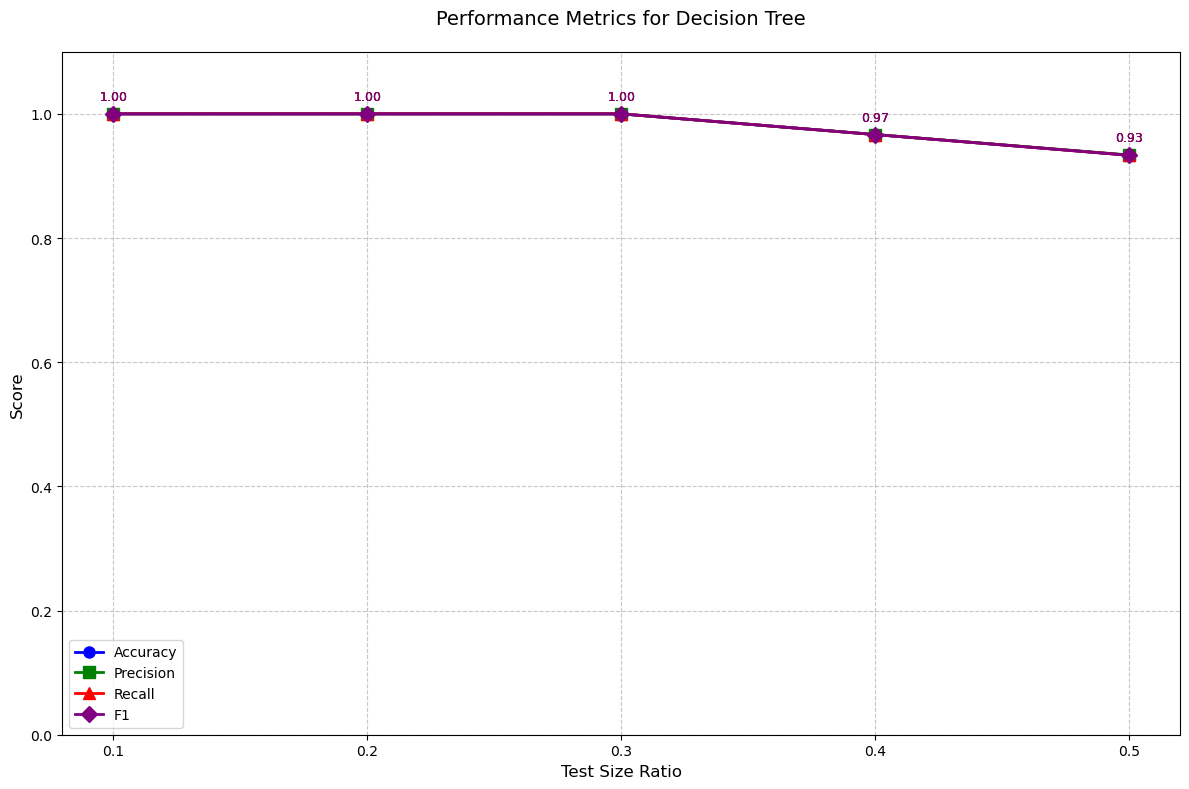

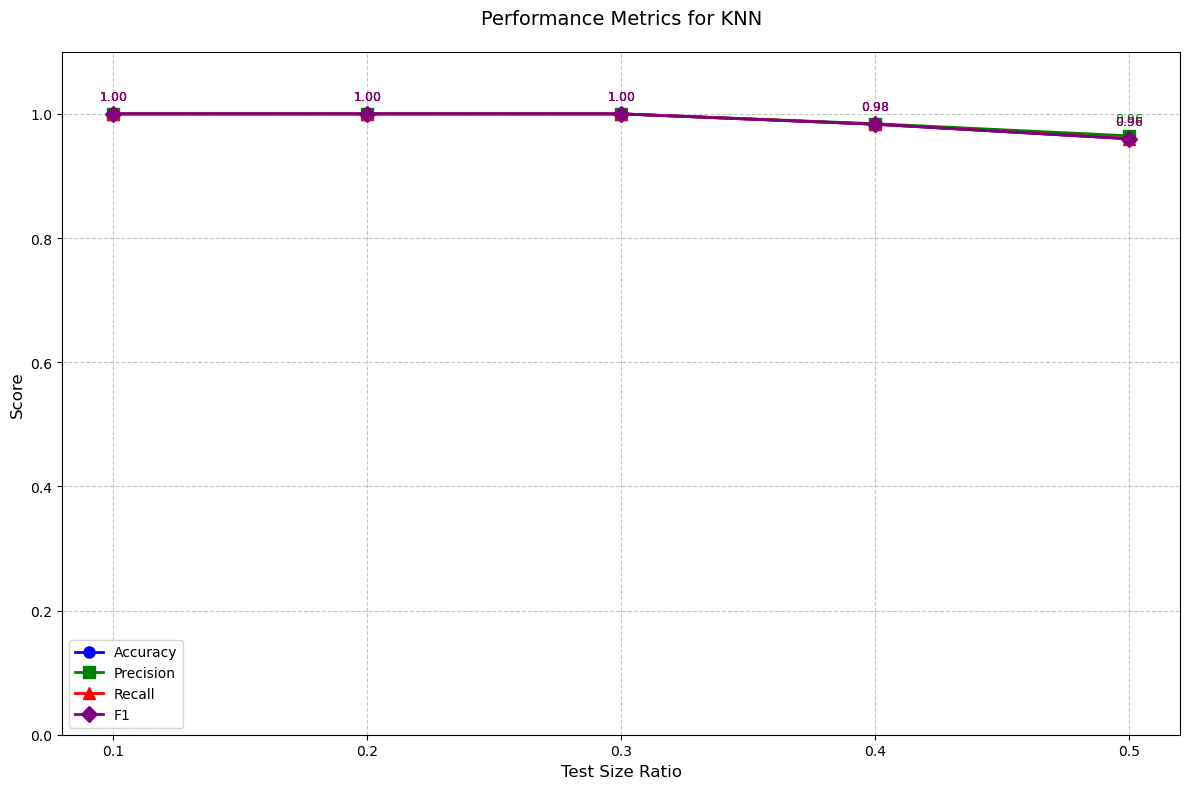

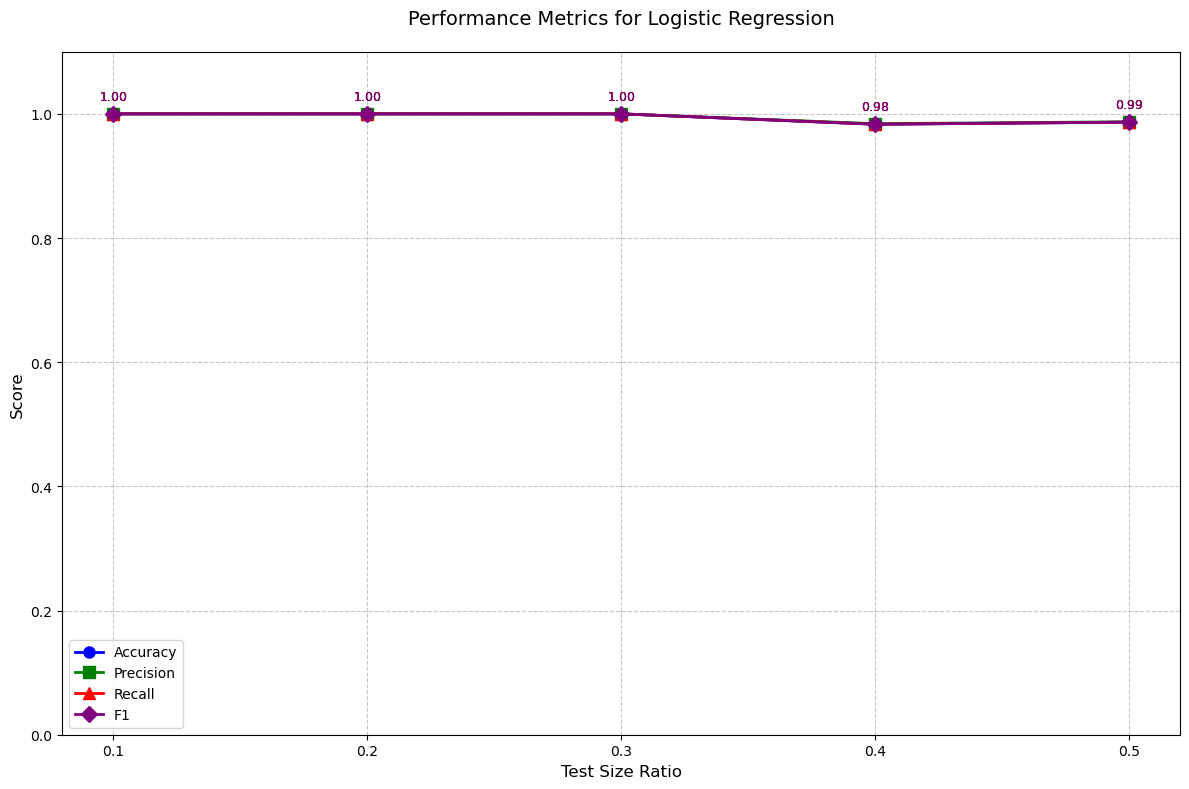

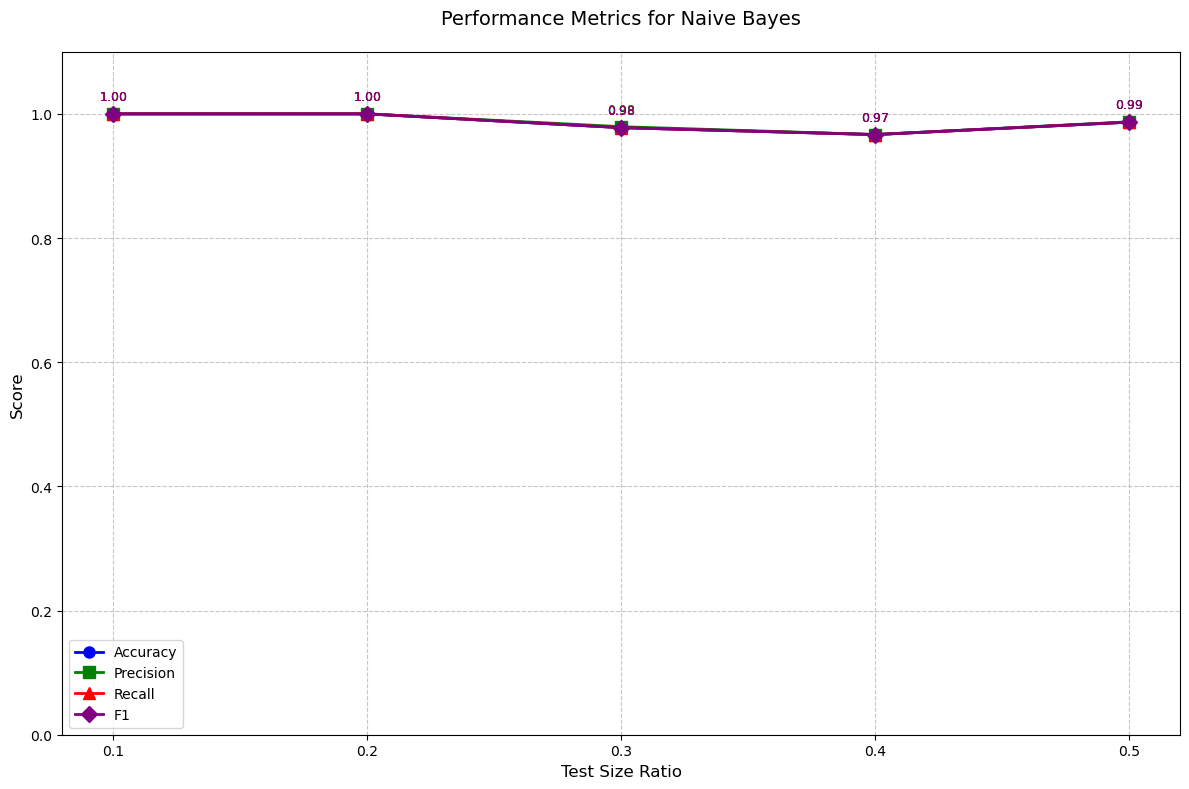

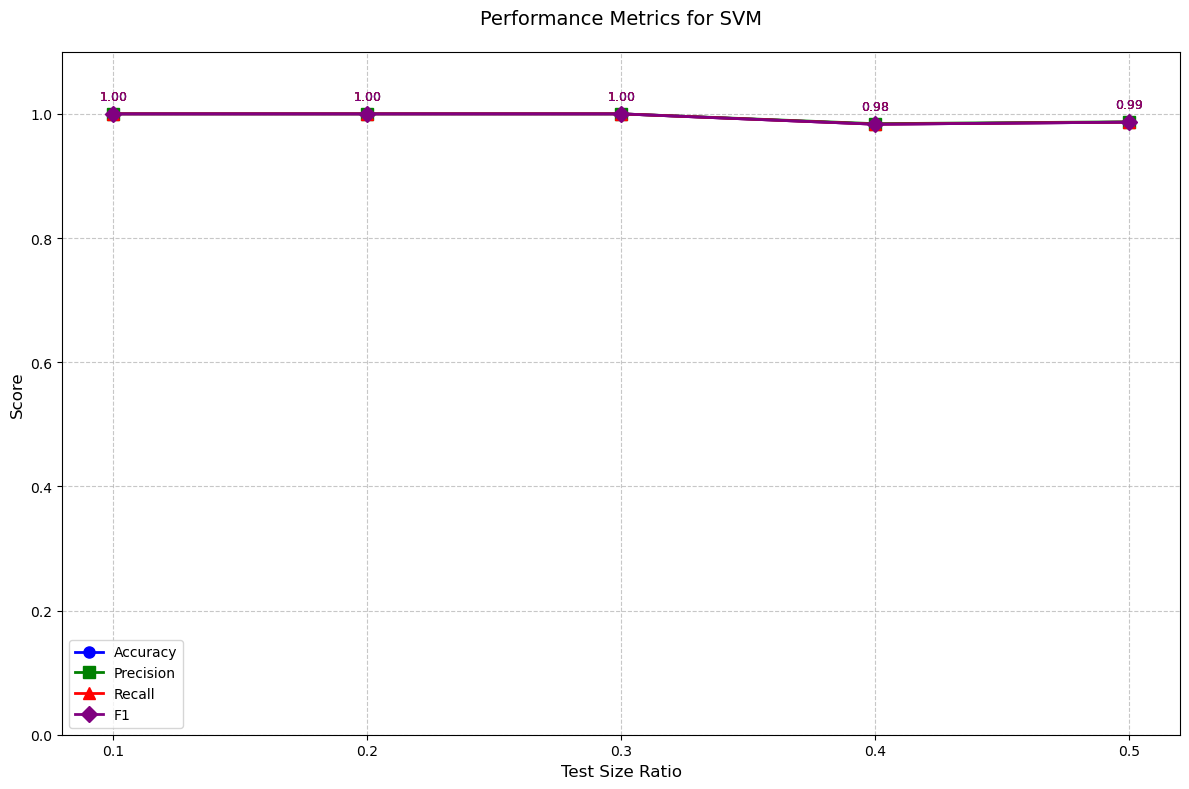

In [10]:
# Plotting
metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 's', '^', 'D']

for name in classifiers.keys():
    plt.figure(figsize=(12, 8))
    
    for metric, color, marker in zip(metrics, colors, markers):
        plt.plot(test_sizes, results[name][metric], 
                marker=marker, color=color, label=metric.capitalize(),
                linewidth=2, markersize=8)
    
    plt.title(f'Performance Metrics for {name}', fontsize=14, pad=20)
    plt.xlabel('Test Size Ratio', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.xticks(test_sizes, fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(0, 1.1)
    
    # Add values on the points
    for metric, color in zip(metrics, colors):
        for x, y in zip(test_sizes, results[name][metric]):
            plt.annotate(f'{y:.2f}', 
                        (x, y), 
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center',
                        fontsize=9,
                        color=color)
    
    plt.tight_layout()
    plt.show()

In [11]:
# Print summary of results
print("\nSummary of Results:")
print("-" * 50)
for name in classifiers.keys():
    print(f"\n{name}:")
    for metric in metrics:
        mean_score = np.mean(results[name][metric])
        std_score = np.std(results[name][metric])
        print(f"{metric.capitalize()}: Mean = {mean_score:.3f}, Std = {std_score:.3f}")


Summary of Results:
--------------------------------------------------

Decision Tree:
Accuracy: Mean = 0.980, Std = 0.027
Precision: Mean = 0.980, Std = 0.027
Recall: Mean = 0.980, Std = 0.027
F1: Mean = 0.980, Std = 0.027

KNN:
Accuracy: Mean = 0.989, Std = 0.016
Precision: Mean = 0.990, Std = 0.014
Recall: Mean = 0.989, Std = 0.016
F1: Mean = 0.989, Std = 0.016

Logistic Regression:
Accuracy: Mean = 0.994, Std = 0.007
Precision: Mean = 0.994, Std = 0.007
Recall: Mean = 0.994, Std = 0.007
F1: Mean = 0.994, Std = 0.007

Naive Bayes:
Accuracy: Mean = 0.986, Std = 0.013
Precision: Mean = 0.987, Std = 0.013
Recall: Mean = 0.986, Std = 0.013
F1: Mean = 0.986, Std = 0.013

SVM:
Accuracy: Mean = 0.994, Std = 0.007
Precision: Mean = 0.994, Std = 0.007
Recall: Mean = 0.994, Std = 0.007
F1: Mean = 0.994, Std = 0.007
